In [13]:
# Imports
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
import copy

In [14]:
# Test datasets
def get_datasets():
    """
    :returns: datasets
    """
    DS_eng = [[35680, 2217],
              [42514, 2761],
              [15162, 990],
              [35298, 2274],
              [29800, 1865],
              [40255, 2606],
              [74532, 4805],
              [37464, 2396],
              [31030, 1993],
              [24843, 1627],
              [36172, 2375],
              [39552, 2560],
              [72545, 4597],
              [75352, 4871],
              [18031, 1119]
             ]

    DS_fre = [[36961, 2503],
              [43621, 2992],
              [15694, 1042],
              [36231, 2487],
              [29945, 2014],
              [40588, 2805],
              [75255, 5062],
              [37709, 2643],
              [30899, 2126],
              [25486, 1784],
              [37497, 2641],
              [40398, 2766],
              [74105, 5047],
              [76725, 5312],
              [18317, 1215]
             ]

    return DS_eng, DS_fre

In [15]:
def encode_two_datasets(DS1, DS2):
    """
    Encodes two datasets (of different classes) into LibSVM form 
    to a textfile called datasets.txt in the current folder.
    """
    
    f = open('datasets.txt','w+')
    
    for obs in DS1:
        f.write('{} 1:{} 2:{}\n'.format(1, obs[0], obs[1]))
    for obs in DS2:
        f.write('{} 1:{} 2:{}\n'.format(0, obs[0], obs[1]))
    f.close()

In [16]:
def decode_libsvm(path):
    """
    Method that decodes data in LibSVM into a scaled matrix of features and a vector of classes.
    :param path: path of the file.
    :returns X, y, scale: scaled feature matrix X, class vector y, scaling factor. 
    """
    f = open(path).read().strip().split('\n')
    m = len(f)
    n = len(f[0].split())
    X = np.zeros((m, n))
    y = np.zeros((m, 1))
    
    observations = [f[i].split() for i in range(len(f))]

    for i, obs in enumerate(observations):
        y[i] = float(obs[0])
        for attr_idx in range(1, n):
            X[i, attr_idx] = float(obs[attr_idx].split(':')[1])
    
    # Normalization based on the total number of characters in the books.
    scale = np.sum(X[:, 1])
    X = np.divide(X, scale)
    # intercept
    X[:, 0] = 1
    return X, y, scale

In [17]:
def perceptron(X, y, w, misclass_tol=1, maxit=10000, suppress_prints=False):
    """
    Perceptron algorithm, decreasing learning rate according to 1000/(1000+iteration).
    :param X: Scaled feature matrix X.
    :param y: Class vector y. 
    :param w: Intitial weigths w.
    :(Optional) param missclass_tol: Terminating criterion, if number of missclassified is 
                            smaller than (or equal to) missclass_tol the method terminates.
    :(Optional) param maxit: Maximal amount of iterations.
    :(Optional) param suppress_prints: Hides prints if set to true.       
    :returns w: Weights w.
    """
    pool_size = len(y)
    
    def pred(w, x):
        if w @ x > 0:
            return 1
        else:
            return 0
    
    lr = 1
    converged = False
    for i in range(1, maxit+1):
        misclassified = 0
        sample_order = np.arange(pool_size)
        rnd.shuffle(sample_order)
        for sample_idx in sample_order:

            sample = X[sample_idx, :]
            label = y[sample_idx]
            prediction = pred(w, sample)
            w += lr*(label - prediction)*sample
            
            if prediction != label:
                misclassified += 1
                
        if misclassified <= misclass_tol:
            if not suppress_prints:
                print('Terminated at iteration: {}'.format(i))
            converged = True
            break
        lr = 1000/(1000+i)
    if not suppress_prints:    
        if not converged:
            print('Max iterations reached.')
    return w

In [18]:
def logr(X, y, w, misclass_tol=1, maxit=10000, suppress_prints=False):
    """
    Classification algorithm, with logistic function as activation function.
    decreasing learning rate according to 1000/(1000+iteration).
    :param X: Scaled feature matrix X.
    :param y: Class vector y. 
    :param w: Intitial weigths w.
    :(Optional) param missclass_tol: Terminating criterion, if number of missclassified is 
                            smaller than (or equal to) missclass_tol the method terminates.
    :(Optional) param maxit: Maximal amount of iterations.
    :(Optional) param suppress_prints: Hides prints if set to true.
    :returns w: Weights w.
    """
    pool_size = len(y)
    
    def pred(w, x):
        p = 1/(1+math.exp(-(w @ x)))
        if p > 0.5:
            return 1
        else:
            return 0
    
    lr = 1
    converged = False
    for i in range(1, maxit+1):
        misclassified = 0
        sample_order = np.arange(pool_size)
        rnd.shuffle(sample_order)
        for sample_idx in sample_order:

            sample = X[sample_idx, :]
            label = y[sample_idx]
            prediction = pred(w, sample)
            w += lr*(label - prediction)*sample
            
            if prediction != label:
                misclassified += 1
                
        if misclassified <= misclass_tol:
            if not suppress_prints:
                print('Terminated at iteration: {}'.format(i))
            converged = True
            break
        lr = 1000/(1000+i)
    if not suppress_prints:    
        if not converged:
            print('Max iterations reached.')
    return w

In [19]:
# Get datasets
DSE, DSF = get_datasets()
encode_two_datasets(DSE, DSF)
X, y, scale = decode_libsvm('/home/eric/Desktop/Programing/Python/python/bin/Programs/EDAP01 Artificial intelligence/HA2_Eric_Rostedt/datasets.txt')

In [66]:
# Run perceptron
w_perc = perceptron(X, y, [0, 0, 0])

Terminated at iteration: 1951


In [67]:
# Run perceptron with logistic function
w_logr = logr(X, y, [0, 0, 0])

Terminated at iteration: 903


[-1.74031380e-05  7.95247184e-02 -1.18518417e+00]


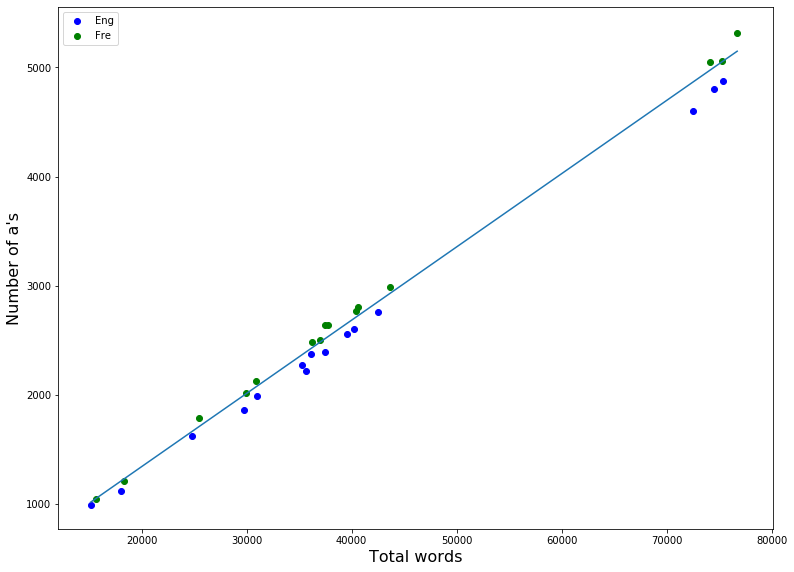

[-1.10438471e-05  4.75977075e-02 -7.11343997e-01]


<Figure size 432x288 with 0 Axes>

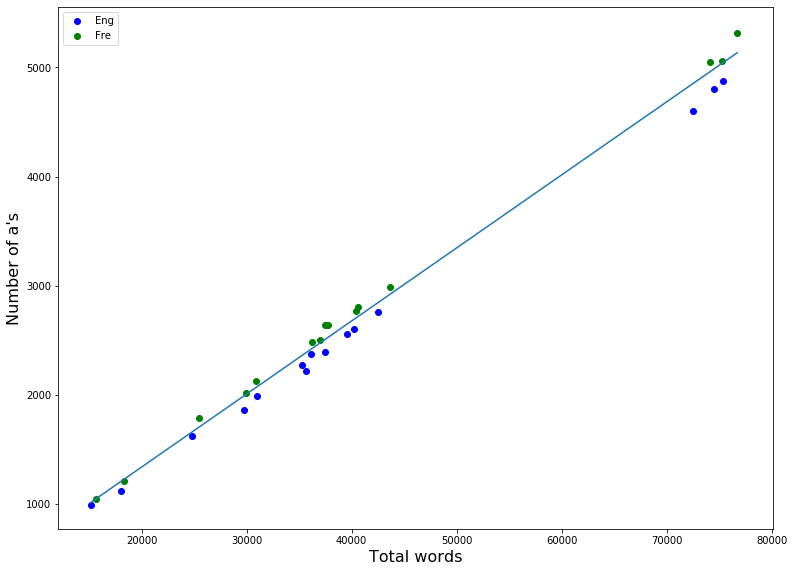

In [68]:
#plot perceptron and perceptron with logistic function.
plotx_DSE = X[:15, 1]*scale
ploty_DSE = X[:15, 2]*scale

plotx_DSF = X[15:, 1]*scale
ploty_DSF = X[15:, 2]*scale

plt.figure(figsize=[12.8, 9.6])
plt.scatter(plotx_DSE, ploty_DSE, c='b')
plt.scatter(plotx_DSF, ploty_DSF, c='g')
plt.legend(['Eng', 'Fre'])

plotx_min = min(X[:, 1]*scale)
min_idx = np.argmin(X[:, 1])
plotx_max = max(X[:, 1]*scale)
max_idx = np.argmax(X[:, 1])

line_perc = [(-w_perc[0] - plotx_min*w_perc[1])/w_perc[2], (-w_perc[0] - plotx_max*w_perc[1])/w_perc[2]]    

print(w_perc)
plt.plot([plotx_min, plotx_max], line_perc)
plt.xlabel('Total words', fontsize=16)
plt.ylabel('Number of a\'s', fontsize=16)
plt.show()

plt.clf()

plt.figure(figsize=[12.8, 9.6])
plt.scatter(plotx_DSE, ploty_DSE, c='b')
plt.scatter(plotx_DSF, ploty_DSF, c='g')
plt.legend(['Eng', 'Fre'])

line_logr = [(-w_logr[0] - w_logr[1]*plotx_min)/w_logr[2], (-w_logr[0] - w_logr[1]*plotx_max)/w_logr[2]]
print(w_logr)
plt.plot([plotx_min, plotx_max], line_logr)
plt.xlabel('Total words', fontsize=16)
plt.ylabel('Number of a\'s', fontsize=16)
plt.show()

In [63]:
def cross_validate(X, y, w0, misclass_tol=1, version='perceptron'):
    """
    Evaluates the classification using leave-one-out cross validation.
    :param X: Feature matrix X
    :param y: Class vector y
    :param w0: Initial guess of weights w0
    :(optional) param misclass_tol: Max tolerated misclassifications
    :(optional) param version: perceptron or logistic regression.
    :return correct, total: correctly predicted points and total points 
    """
    data_points = len(y)
    correct_count = 0
    
    def correct_perceptron(x, y, w):
        # Correct prediction if over the line and of class 1 or if under the line and class 0, Perceptron.
        if (w @ x > 0 and y == 1) or (w @ x < 0 and y == 0):
            return True
        else:
            return False
        
    def correct_logr(x, y, w):
        # Verify if prediction is correct. Log Reg.
        if (1/(1+math.exp(-(w @ x))) > 0.5 and y == 1) or (1/(1+math.exp(-(w @ x))) < 0.5 and y == 0):
            return True
        else:
            return False
    
    # Iterate over all data points
    for point in range(data_points):
        # Save point to be picked out.
        X_picked_out_point = X[point]
        y_picked_out_point = y[point]

        # Remove the point which will be predicted on, from the arrays.
        X = np.delete(X, point, 0)
        y = np.delete(y, point)

        # Run algorithm on all but the current picked out point. 
        if version =='perceptron':
            w = perceptron(X, y, w0, misclass_tol=misclass_tol, maxit=10000, suppress_prints=True)
            
            # Check if the prediction of the picked out point is correct.
            if correct_perceptron(X_picked_out_point, y_picked_out_point, w):
                correct_count += 1
        else:
            w = logr(X, y, w0, misclass_tol=misclass_tol, maxit=10000, suppress_prints=True)
            
            if correct_logr(X_picked_out_point, y_picked_out_point, w):
                correct_count += 1
        
        # Insert back the picked out point
        X = np.insert(X, point, X_picked_out_point, 0)
        y = np.insert(y, point, y_picked_out_point)
        
    return correct_count, data_points

In [64]:
# See acc.
correct_perc, total_perc = cross_validate(X, y, [0, 0, 0], misclass_tol=1, version='perceptron')
correct_logr, total_logr = cross_validate(X, y, [0, 0, 0], misclass_tol=1, version='log')
    
print('Perceptron correct: {} out of {}.'.format(correct_perc, total_perc))
print('Logistic regression correct: {} out of {}.'.format(correct_logr, total_logr))

Perceptron correct: 25 out of 30.
Logistic regression correct: 25 out of 30.
